# What university-level factors predict earnings. 

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 1800)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

%matplotlib inline

mpl.rc('savefig', dpi=200)
params = {'figure.dpi' : 200,
          'figure.figsize' : (12, 10),
          'axes.axisbelow' : True,
          'lines.antialiased' : True,
          'axes.titlesize' : 'xx-large',
          'axes.labelsize' : 'x-large',
          'xtick.labelsize' : 'large',
          'ytick.labelsize' : 'large'}

for (k, v) in params.items():
    plt.rcParams[k] = v


In [2]:
import sqlite3


con = sqlite3.connect('output/database.sqlite')
data = pd.read_sql("SELECT * \
FROM Scorecard \
WHERE 1 = 1 \
AND md_earn_wne_p6 != 'PrivacySuppressed' AND md_earn_wne_p6 IS NOT NULL \
AND PREDDEG != 'PrivacySuppressed' AND PREDDEG IS NOT NULL \
AND HIGHDEG != 'PrivacySuppressed' AND HIGHDEG IS NOT NULL \
AND CONTROL != 'PrivacySuppressed' AND CONTROL IS NOT NULL \
AND NUMBRANCH != 'PrivacySuppressed' AND NUMBRANCH IS NOT NULL \
AND AVGFACSAL != 'PrivacySuppressed' AND AVGFACSAL IS NOT NULL \
AND ADM_RATE != 'PrivacySuppressed' AND ADM_RATE IS NOT NULL \
AND SAT_AVG != 'PrivacySuppressed' AND SAT_AVG IS NOT NULL \
AND TUITFTE != 'PrivacySuppressed' AND TUITFTE IS NOT NULL \
AND UGDS != 'PrivacySuppressed' AND UGDS IS NOT NULL \
AND UGDS_NRA != 'PrivacySuppressed' AND UGDS_NRA IS NOT NULL \
AND PPTUG_EF != 'PrivacySuppressed' AND PPTUG_EF IS NOT NULL \
AND UG25abv != 'PrivacySuppressed' AND UG25abv IS NOT NULL \
AND PAR_ED_PCT_1STGEN != 'PrivacySuppressed' AND PAR_ED_PCT_1STGEN IS NOT NULL \
AND DEP_INC_AVG != 'PrivacySuppressed' AND DEP_INC_AVG IS NOT NULL \
AND IND_INC_AVG != 'PrivacySuppressed' AND IND_INC_AVG IS NOT NULL \
AND COMP_ORIG_YR2_RT != 'PrivacySuppressed' AND COMP_ORIG_YR2_RT IS NOT NULL \
AND WDRAW_ORIG_YR2_RT != 'PrivacySuppressed' AND WDRAW_ORIG_YR2_RT IS NOT NULL \
AND ENRL_ORIG_YR2_RT != 'PrivacySuppressed' AND ENRL_ORIG_YR2_RT IS NOT NULL \
AND COMP_ORIG_YR4_RT != 'PrivacySuppressed' AND COMP_ORIG_YR4_RT IS NOT NULL \
AND WDRAW_ORIG_YR4_RT != 'PrivacySuppressed' AND WDRAW_ORIG_YR4_RT IS NOT NULL \
AND ENRL_ORIG_YR4_RT != 'PrivacySuppressed' AND ENRL_ORIG_YR4_RT IS NOT NULL \
AND OVERALL_YR2_N != 'PrivacySuppressed' AND OVERALL_YR2_N IS NOT NULL \
AND OVERALL_YR3_N != 'PrivacySuppressed' AND OVERALL_YR3_N IS NOT NULL \
AND OVERALL_YR4_N != 'PrivacySuppressed' AND OVERALL_YR4_N IS NOT NULL \
AND OVERALL_YR6_N != 'PrivacySuppressed' AND OVERALL_YR6_N IS NOT NULL \
AND OVERALL_YR8_N != 'PrivacySuppressed' AND OVERALL_YR8_N IS NOT NULL \
AND count_nwne_p6 != 'PrivacySuppressed' AND count_nwne_p6 IS NOT NULL \
AND DEBT_MDN != 'PrivacySuppressed' AND DEBT_MDN IS NOT NULL \
AND GRAD_DEBT_MDN != 'PrivacySuppressed' AND GRAD_DEBT_MDN IS NOT NULL \
AND WDRAW_DEBT_MDN != 'PrivacySuppressed' AND WDRAW_DEBT_MDN IS NOT NULL \
", con)

cols = data.columns.values.tolist()
cols =  [x for x in cols if x != 'md_earn_wne_p6']


#use cross-validation to find usefull columns
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

X = data[cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other]
y = data['md_earn_wne_p6']
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=10)
selector = selector.fit(X, y)

In [4]:
cols_target = ['md_earn_wne_p6']

cols_school = ['PREDDEG', 'HIGHDEG', 'CONTROL', 'NUMBRANCH', 'AVGFACSAL']
#                'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10',
#                'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
#                'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26',
#                'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39',
#                'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
#                'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51',
#                'PCIP52', 'PCIP54']

# cols_admissions = ['ADM_RATE', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SAT_AVG']
cols_admissions = ['ADM_RATE', 'SAT_AVG']


cols_costs = ['TUITFTE']

# ignore cols_studentbody = ['UG25abv', 'OVERALL_YR3_N', ]

cols_studentbody = ['UGDS', 'UGDS_NRA', 'PPTUG_EF', 'UG25abv',
                    'PAR_ED_PCT_1STGEN', 'DEP_INC_AVG', 'IND_INC_AVG',
                    'COMP_ORIG_YR2_RT', 'WDRAW_ORIG_YR2_RT', 'ENRL_ORIG_YR2_RT',
                    'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT',
                    'OVERALL_YR2_N', 'OVERALL_YR3_N', 'OVERALL_YR4_N',
                    'OVERALL_YR6_N', 'OVERALL_YR8_N', 'count_nwne_p6']

cols_financialaid = ['DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN']

cols_other = []
#['type']


    
data_reduced = data[cols_target+cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other]

#print where clause
for c in data_reduced.columns:
    print ("AND {} != 'PrivacySuppressed' AND {} IS NOT NULL \\").format(c, c)

AND md_earn_wne_p6 != 'PrivacySuppressed' AND md_earn_wne_p6 IS NOT NULL \
AND PREDDEG != 'PrivacySuppressed' AND PREDDEG IS NOT NULL \
AND HIGHDEG != 'PrivacySuppressed' AND HIGHDEG IS NOT NULL \
AND CONTROL != 'PrivacySuppressed' AND CONTROL IS NOT NULL \
AND NUMBRANCH != 'PrivacySuppressed' AND NUMBRANCH IS NOT NULL \
AND AVGFACSAL != 'PrivacySuppressed' AND AVGFACSAL IS NOT NULL \
AND ADM_RATE != 'PrivacySuppressed' AND ADM_RATE IS NOT NULL \
AND SAT_AVG != 'PrivacySuppressed' AND SAT_AVG IS NOT NULL \
AND TUITFTE != 'PrivacySuppressed' AND TUITFTE IS NOT NULL \
AND UGDS != 'PrivacySuppressed' AND UGDS IS NOT NULL \
AND UGDS_NRA != 'PrivacySuppressed' AND UGDS_NRA IS NOT NULL \
AND PPTUG_EF != 'PrivacySuppressed' AND PPTUG_EF IS NOT NULL \
AND UG25abv != 'PrivacySuppressed' AND UG25abv IS NOT NULL \
AND PAR_ED_PCT_1STGEN != 'PrivacySuppressed' AND PAR_ED_PCT_1STGEN IS NOT NULL \
AND DEP_INC_AVG != 'PrivacySuppressed' AND DEP_INC_AVG IS NOT NULL \
AND IND_INC_AVG != 'PrivacySuppress

In [5]:
data_reduced.describe()

,md_earn_wne_p6,NUMBRANCH,AVGFACSAL,ADM_RATE,SAT_AVG,TUITFTE,UGDS,UGDS_NRA,PPTUG_EF,UG25abv,PAR_ED_PCT_1STGEN,DEP_INC_AVG,IND_INC_AVG,COMP_ORIG_YR2_RT,WDRAW_ORIG_YR2_RT,ENRL_ORIG_YR2_RT,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,count_nwne_p6,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN
count,3813.000000,3813.00000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000
mean,35929.163388,1.35851,6809.877262,0.671607,1043.966693,9465.493837,6786.271702,0.025670,0.153425,0.214877,0.358829,77767.059948,28764.578456,0.114089,0.176014,0.443231,0.401394,0.215441,0.074595,1758.859691,1663.831366,1653.484920,1547.433255,1431.639654,189.714398,13923.513769,18105.624443,9888.565827
std,8127.247724,1.94608,1684.149188,0.175882,114.147137,5682.893841,7294.442595,0.032115,0.123512,0.150835,0.099690,20691.508254,9728.644298,0.066737,0.076857,0.108170,0.166371,0.099065,0.045738,2054.626282,1888.366806,1856.012007,1719.710927,1609.411491,477.191665,3577.135226,4293.468107,3020.400384
min,15600.000000,1.00000,2794.000000,0.062600,725.000000,359.000000,208.000000,0.000000,0.000000,0.001200,0.061080,17664.603990,904.359834,0.000000,0.009311,0.000000,0.016340,0.013201,0.000000,100.000000,76.000000,75.000000,52.000000,18.000000,3.000000,2624.000000,5027.500000,2610.000000
25%,31100.000000,1.00000,5652.000000,0.566800,971.000000,4900.000000,1933.000000,0.006900,0.060400,0.096300,0.291436,65441.347200,22297.594790,0.071429,0.120785,0.376176,0.282958,0.147457,0.040360,576.000000,550.000000,546.000000,514.000000,472.000000,50.000000,11625.000000,15975.000000,7500.000000
50%,35100.000000,1.00000,6499.000000,0.690800,1030.000000,8359.000000,3958.000000,0.015400,0.121100,0.187800,0.366432,77586.657320,27012.583010,0.103002,0.168367,0.444302,0.398473,0.200643,0.066406,1066.000000,1011.000000,998.000000,949.000000,877.000000,96.000000,14000.000000,17125.000000,9700.000000
75%,39500.000000,1.00000,7713.000000,0.794200,1104.000000,12749.000000,8784.000000,0.032800,0.216100,0.293200,0.427155,90249.036240,34323.158300,0.141553,0.223986,0.513991,0.512270,0.264706,0.100367,2188.000000,2074.000000,2044.000000,1935.000000,1780.000000,203.000000,16250.000000,20569.000000,11625.000000
max,118300.000000,23.00000,15922.000000,1.000000,1491.000000,46776.000000,66864.000000,0.436400,0.915500,0.874500,0.661519,154884.532500,73242.656770,0.664122,0.587101,0.785476,0.924825,0.621163,0.393186,47642.000000,35907.000000,20854.000000,14293.000000,13852.000000,8098.000000,25750.000000,38909.500000,24252.500000


In [11]:
from sklearn import preprocessing
catconv = preprocessing.LabelEncoder()

#to convert into numbers

data_reduced['PREDDEG_N'] = catconv.fit_transform(data_reduced.PREDDEG)
data_reduced['HIGHDEG_N'] = catconv.fit_transform(data_reduced.HIGHDEG)
data_reduced['CONTROL_N'] = catconv.fit_transform(data_reduced.CONTROL)

cols_school = ['PREDDEG_N', 'HIGHDEG_N', 'CONTROL_N', 'NUMBRANCH', 'AVGFACSAL']



In [15]:
data_reduced.PREDDEG_N

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
3783    2
3784    1
3785    2
3786    2
3787    2
3788    2
3789    2
3790    2
3791    2
3792    2
3793    2
3794    2
3795    2
3796    2
3797    2
3798    2
3799    2
3800    2
3801    2
3802    2
3803    2
3804    2
3805    2
3806    2
3807    2
3808    2
3809    2
3810    2
3811    2
3812    0
Name: PREDDEG_N, dtype: int64

In [ ]:
#redifine school columns



for c in data_reduced.describe().columns:
    if (data_reduced[c].dtype == object) and (c != 'type'):
        data_reduced[c] = data_reduced[c].apply(lambda x: float(x) if x != 'PrivacySuppressed' & x.isdigit() else np.nan)
        data_reduced[c] = data_reduced[c].astype(float)
        
data_reduced.dropna(inplace=True)

data_reduced.describe()

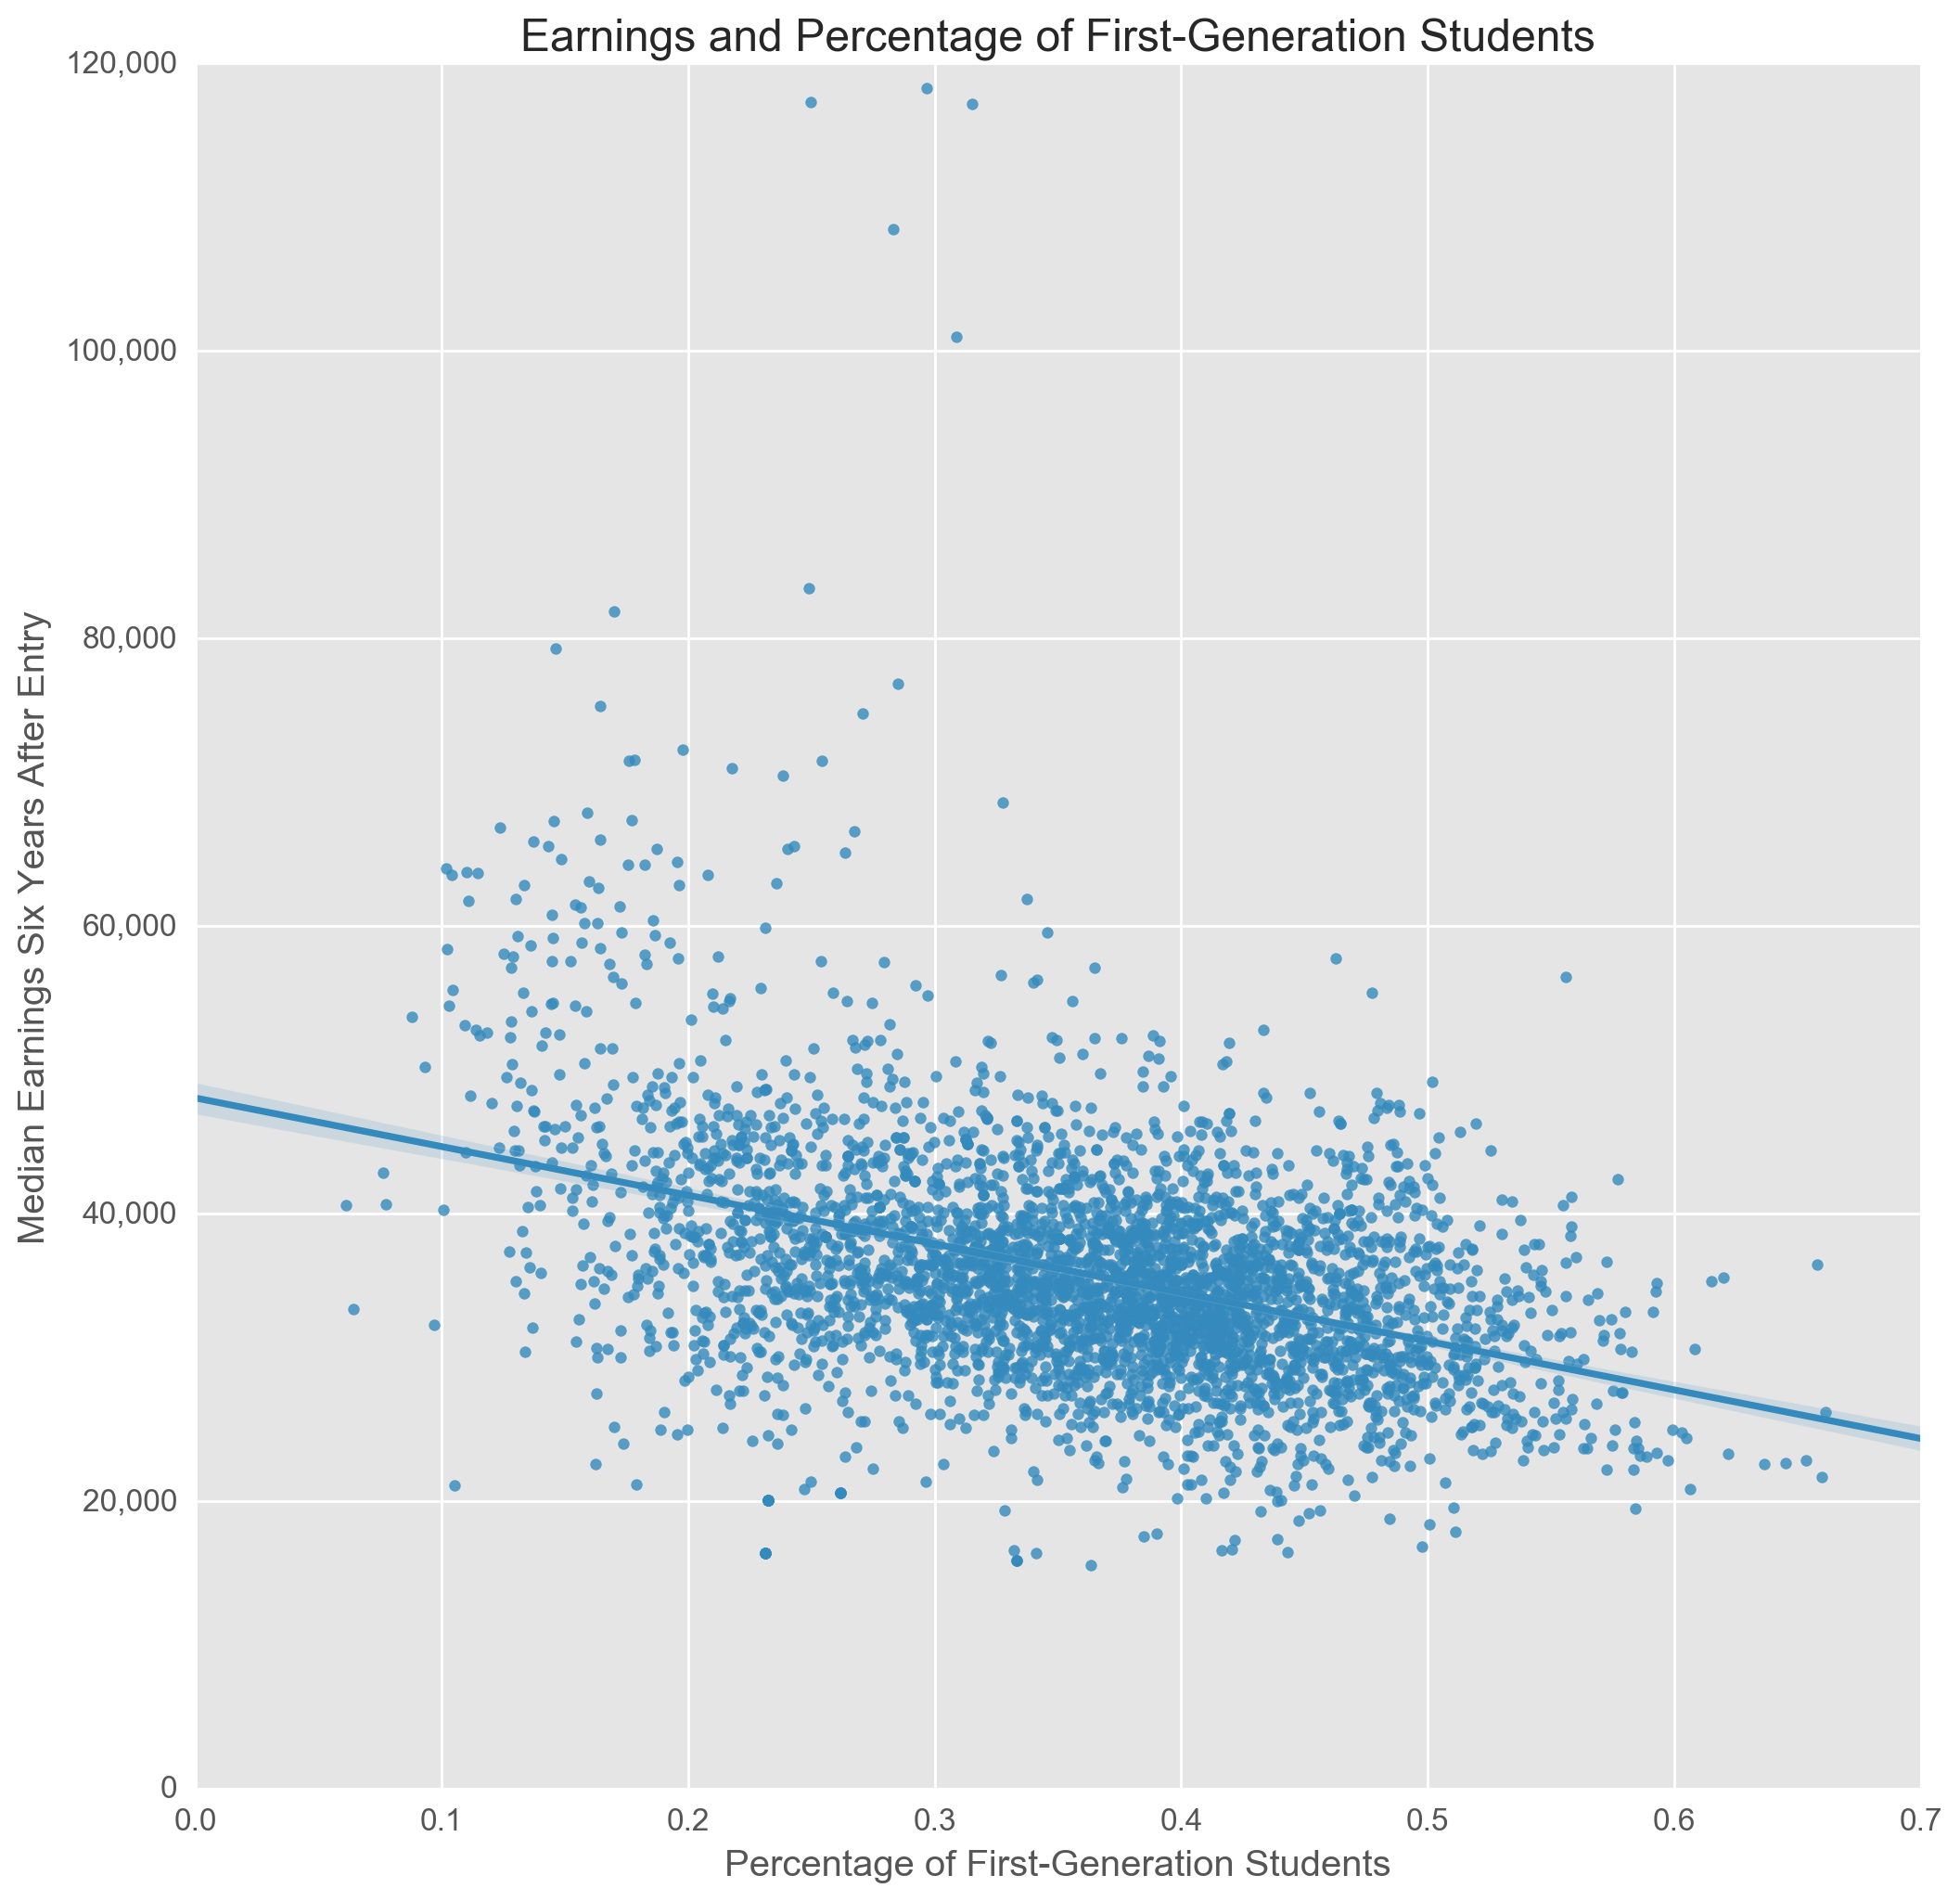

In [7]:
plt.figure(figsize=(12, 12))

sns.regplot(x=data_reduced.PAR_ED_PCT_1STGEN, y=data_reduced.md_earn_wne_p6, color='#348ABD');

plt.title('Earnings and Percentage of First-Generation Students')
plt.xlabel('Percentage of First-Generation Students')
plt.ylabel('Median Earnings Six Years After Entry')

plt.ylim(0, 120000);

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)


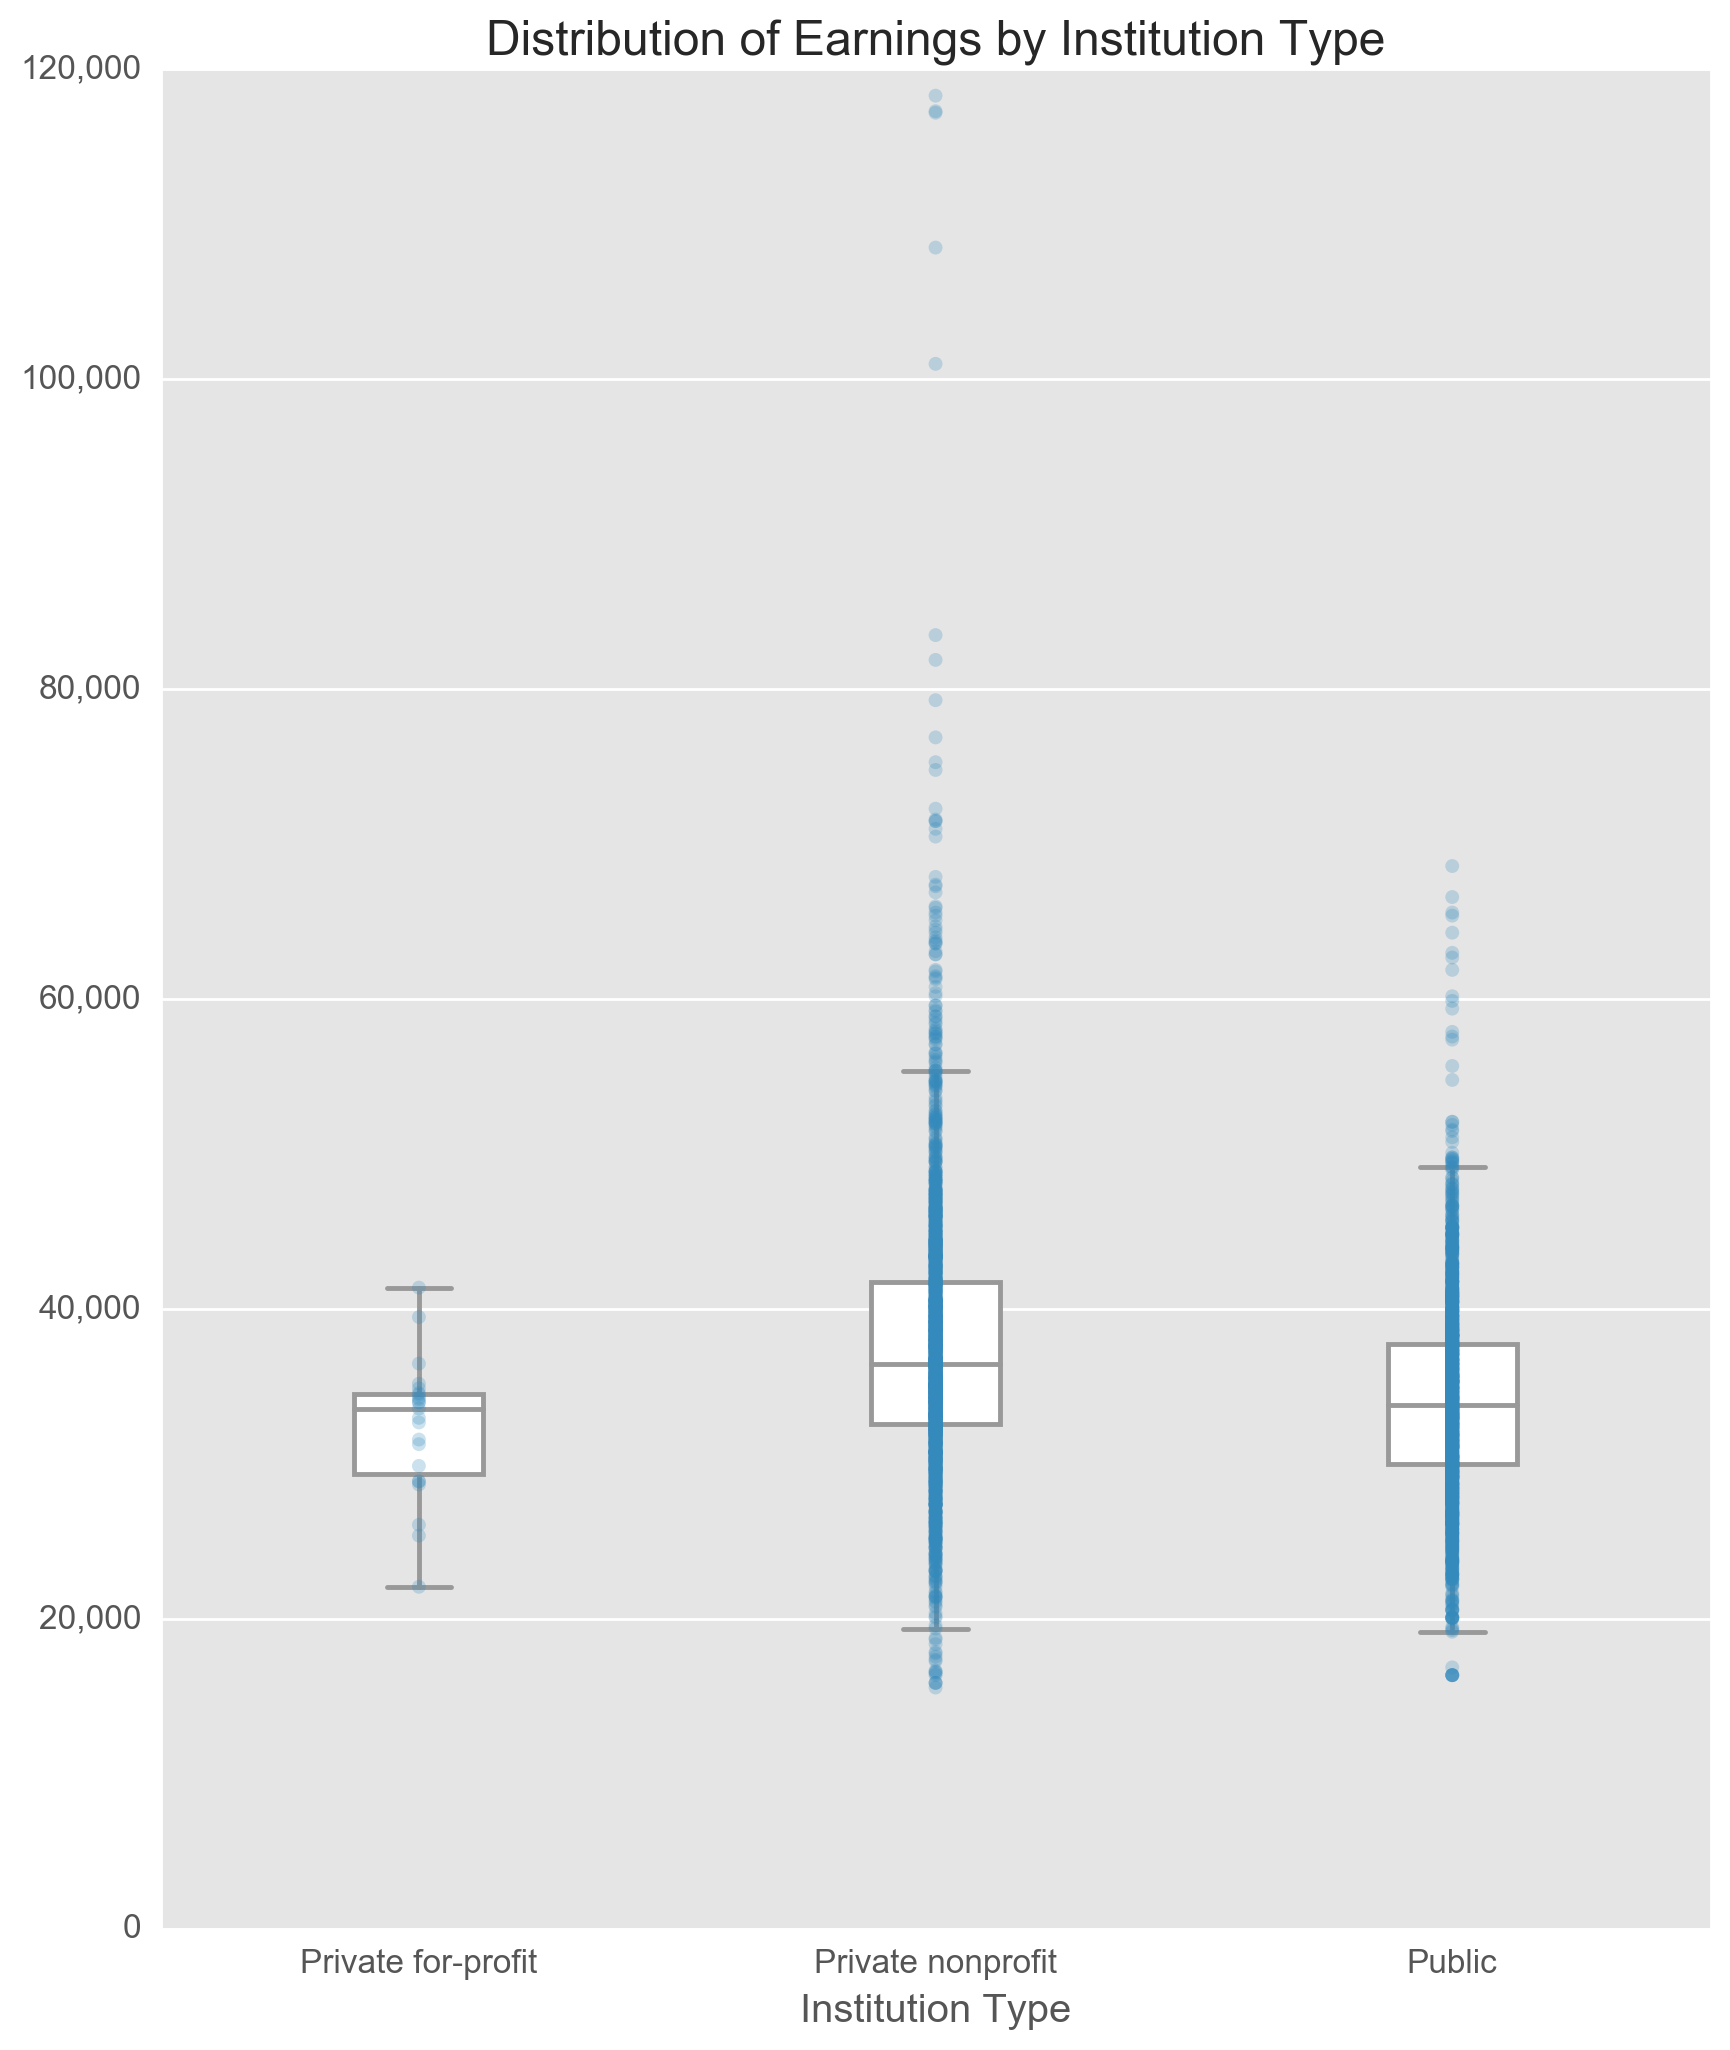

In [8]:

plt.figure(figsize=(10, 12))

sns.boxplot(x="CONTROL", y="md_earn_wne_p6", data=data,
            order=np.sort(data.CONTROL.unique()), color='White',
            fliersize=0, width=0.25)
sns.stripplot(x="CONTROL", y="md_earn_wne_p6", data=data,
              order=np.sort(data.CONTROL.unique()),
              alpha=0.25, size=5,
              color='#348ABD', edgecolor='#348ABD')

plt.title('Distribution of Earnings by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('')

#plt.xticks(range(3), ['Public', 'Private Nonprofit', 'Private For-profit'])

plt.ylim(0, 120000);

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)


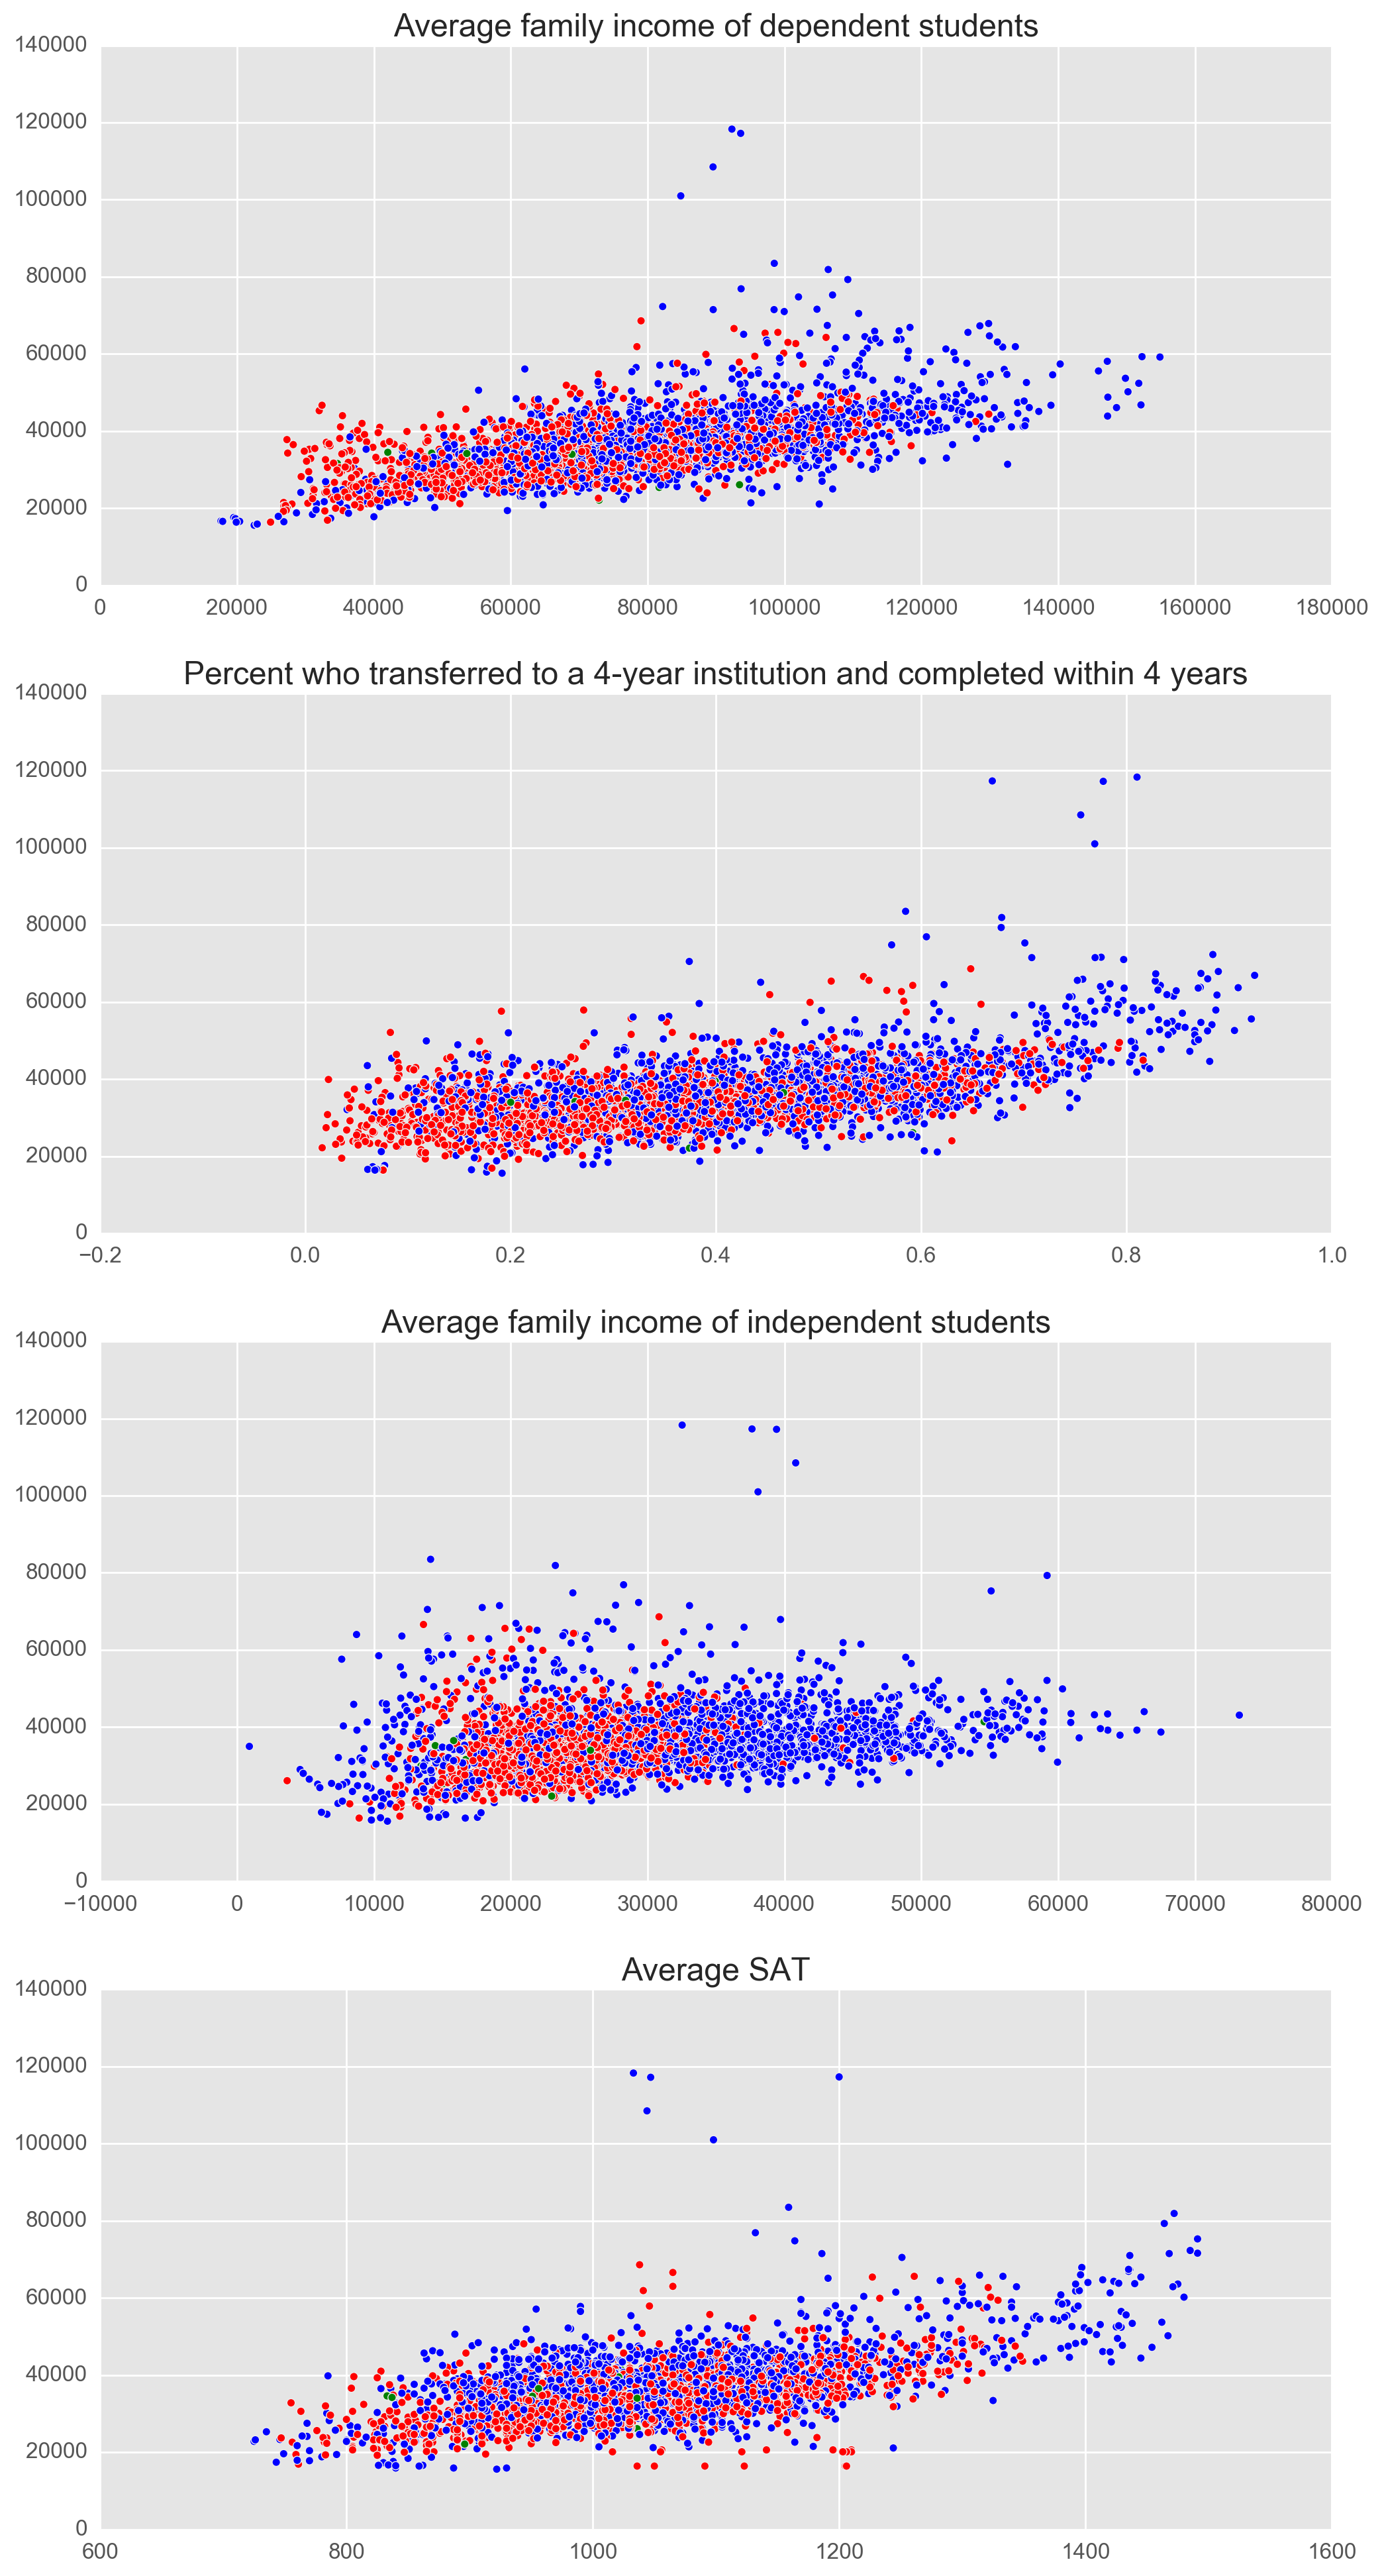

In [9]:
# display 4 important variables 

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=False, sharey=True)
colors = {'Public':'red', 'Private nonprofit':'blue', 'Private for-profit':'green', }

ax1.set_title('Average family income of dependent students')
ax1.scatter(data_reduced.DEP_INC_AVG, data_reduced.md_earn_wne_p6, c=data_reduced.CONTROL.apply(lambda x: colors[x]))
ax2.set_title('Percent who transferred to a 4-year institution and completed within 4 years')
ax2.scatter(data_reduced.COMP_ORIG_YR4_RT , data_reduced.md_earn_wne_p6, c=data_reduced.CONTROL.apply(lambda x: colors[x]))
ax3.set_title('Average family income of independent students')
ax3.scatter(data_reduced.IND_INC_AVG, data_reduced.md_earn_wne_p6, c=data_reduced.CONTROL.apply(lambda x: colors[x]))
ax4.set_title('Average SAT')
ax4.scatter(data_reduced.SAT_AVG, data_reduced.md_earn_wne_p6, c=data_reduced.CONTROL.apply(lambda x: colors[x]))


# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(top=2)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)




In [12]:
#Step 1 PCA
#Scale the features and center 
from sklearn import preprocessing
X = data_reduced[cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other]

X_scaled = preprocessing.scale(X)

pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03,3.813000e+03
mean,1.146037e-16,-8.874796e-17,3.567389e-16,-1.045147e-15,2.202976e-16,-5.999950e-16,-2.590520e-16,-6.196052e-17,8.601098e-17,1.254351e-16,1.333549e-16,1.630540e-18,-1.084891e-16,1.727208e-16,-7.369458e-17,-7.011322e-17,-2.103105e-16,1.500970e-16,-2.129602e-16,4.568424e-17,4.178259e-17,6.685214e-17,4.053057e-17,-4.274344e-17,-4.612099e-17,-1.065674e-16,-5.625363e-17,1.299424e-15,-3.208844e-15,-3.128890e-16
std,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00
min,-1.081698e+01,-4.659976e+00,-2.916827e+00,-1.842459e-01,-2.384827e+00,-3.463047e+00,-2.794713e+00,-1.602650e+00,-9.019379e-01,-7.994230e-01,-1.242347e+00,-1.416808e+00,-2.987134e+00,-2.905073e+00,-2.864106e+00,-1.709752e+00,-2.169294e+00,-4.098078e+00,-2.314740e+00,-2.041747e+00,-1.631136e+00,-8.074837e-01,-8.409593e-01,-8.505828e-01,-8.696981e-01,-8.784733e-01,-3.913289e-01,-3.159231e+00,-3.046451e+00,-2.410118e+00
25%,1.700059e-01,3.558288e-01,-9.632242e-01,-1.842459e-01,-6.876048e-01,-5.959744e-01,-6.393175e-01,-8.034802e-01,-6.654255e-01,-5.845395e-01,-7.532615e-01,-7.862363e-01,-6.761153e-01,-5.957676e-01,-6.648236e-01,-6.393112e-01,-7.186838e-01,-6.199914e-01,-7.119726e-01,-6.863413e-01,-7.485942e-01,-5.757810e-01,-5.899158e-01,-5.967796e-01,-6.010131e-01,-5.963456e-01,-2.928231e-01,-6.426414e-01,-4.963130e-01,-7.909147e-01
50%,1.700059e-01,3.558288e-01,-9.632242e-01,-1.842459e-01,-1.846143e-01,1.091367e-01,-1.223730e-01,-1.947316e-01,-3.877805e-01,-3.198280e-01,-2.617472e-01,-1.795348e-01,7.627310e-02,-8.719823e-03,-1.801099e-01,-1.661443e-01,-9.950399e-02,9.899291e-03,-1.755747e-02,-1.493933e-01,-1.790637e-01,-3.372636e-01,-3.457575e-01,-3.532148e-01,-3.480304e-01,-3.446678e-01,-1.964131e-01,2.138478e-02,-2.284291e-01,-6.243893e-02
75%,1.700059e-01,3.558288e-01,9.903789e-01,-1.842459e-01,5.363190e-01,6.971084e-01,5.259981e-01,5.778635e-01,2.739058e-01,2.220520e-01,5.075091e-01,5.193323e-01,6.854660e-01,6.033206e-01,5.714372e-01,4.115778e-01,6.242565e-01,6.542398e-01,6.665274e-01,4.973687e-01,5.635434e-01,2.088928e-01,2.172366e-01,2.104331e-01,2.253969e-01,2.164804e-01,2.784488e-02,6.504622e-01,5.738248e-01,5.749774e-01
max,5.663501e+00,2.863731e+00,9.903789e-01,1.112201e+01,5.411230e+00,1.867365e+00,3.916804e+00,6.566267e+00,8.237176e+00,1.279118e+01,6.170855e+00,4.373710e+00,3.036697e+00,3.727500e+00,4.572468e+00,8.242893e+00,5.349451e+00,3.164363e+00,3.146590e+00,4.096056e+00,6.966464e+00,2.233455e+01,1.813613e+01,1.034639e+01,7.412431e+00,7.718343e+00,1.657473e+01,3.306567e+00,4.846107e+00,4.756263e+00


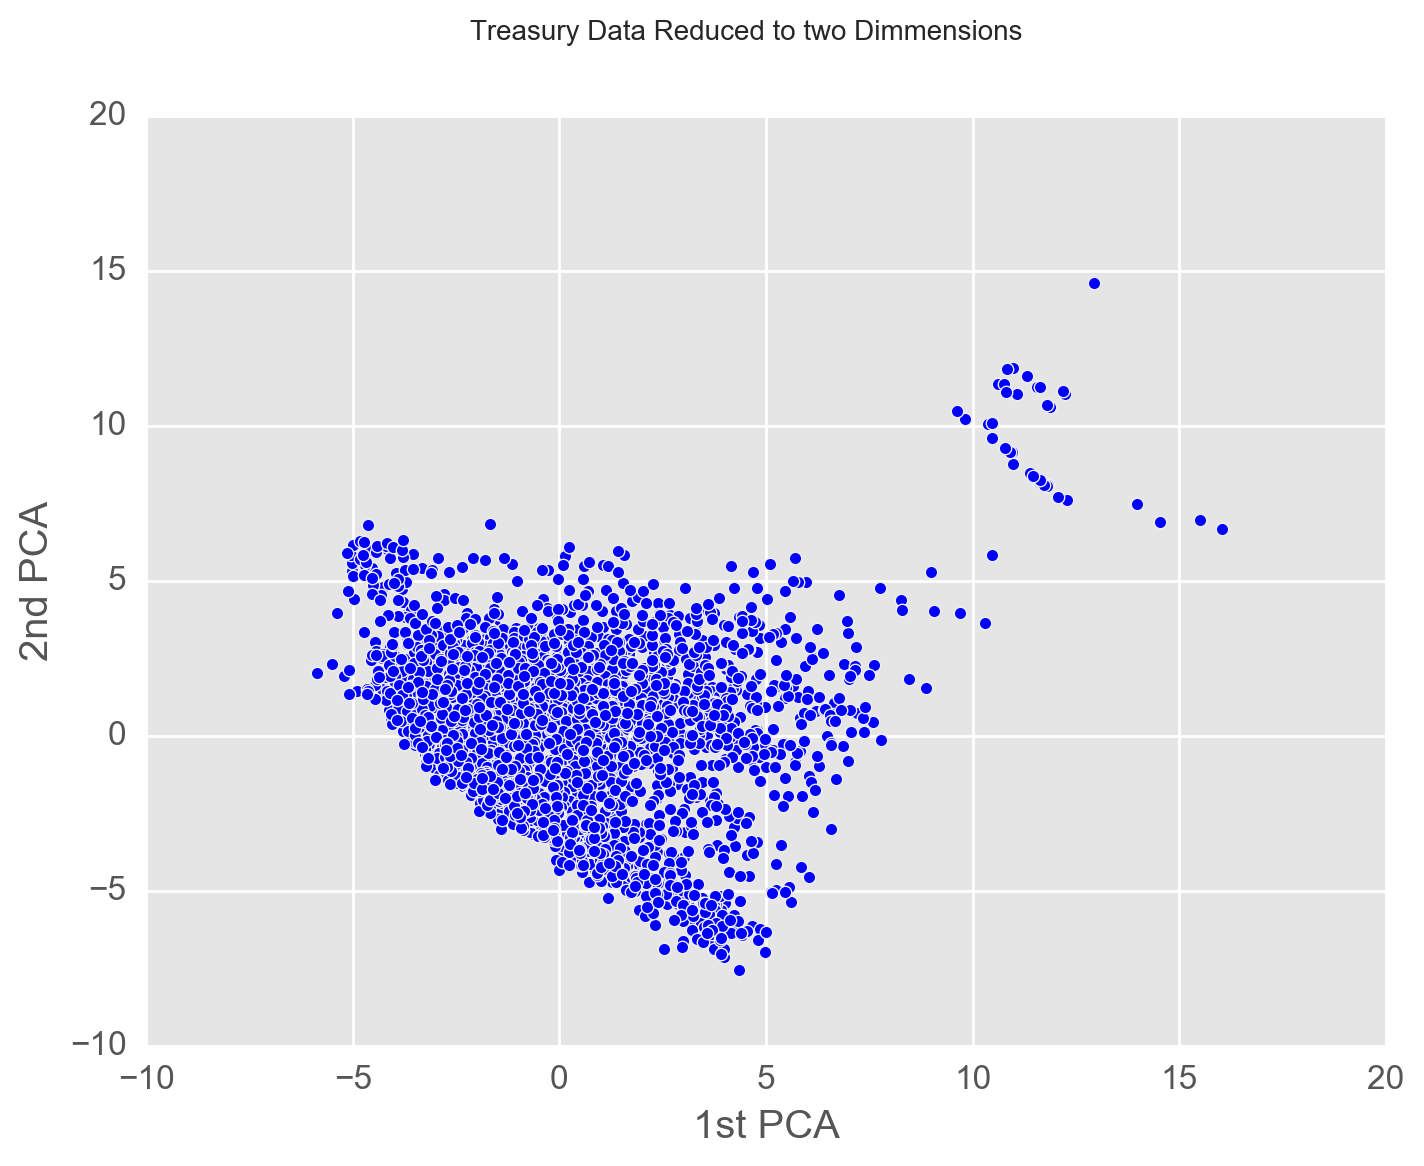

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)
projectedAxes = pca.transform(X_scaled)
eigenValues = pca.explained_variance_ratio_
loadings = pca.components_

pcaDF = pd.DataFrame(columns=X.columns.values)
pcaDF['comp1'] = loadings[0]
pcaDF['comp2'] = loadings[1]

# Use any loadings > mean loadings for each component and obtain the index
# The index will be a column/variable from the original dataframe kmeansUni
comp1 = list(pcaDF[(pcaDF['comp1']>np.mean(pcaDF['comp1']))].index)
comp2 = list(pcaDF[(pcaDF['comp2']>np.mean(pcaDF['comp2']))].index)

# Slice original dataframe to only keep comp1 columns
comp1DF = X[comp1]

fig = plt.figure(1, figsize=(8, 6))
ax = fig

plt.scatter(projectedAxes[:,0], projectedAxes[:,1]  )
fig.suptitle("Treasury Data Reduced to two Dimmensions")
plt.xlabel("1st PCA")
plt.ylabel("2nd PCA")


In [22]:
from sklearn.model_selection import train_test_split
#Separte data into training and test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split (data_reduced[cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other], data_reduced['md_earn_wne_p6'], test_size=0.4, random_state=0 )
X_train.shape, X_test.shape

((2287, 30), (1526, 30))

In [23]:
# Implement Regression models
#Linear Regression
from sklearn import linear_model

clf  = linear_model.LinearRegression()
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))



('Coefficients: \n', array([  3.17057252e+02,  -4.43562371e+02,  -4.05092970e+02,
         1.38261456e+02,   1.44218789e+00,  -1.67682362e+03,
         1.18071721e+01,   2.18640260e-01,  -1.38592209e-01,
        -1.25550130e+02,   1.41592170e+03,   2.57353976e+03,
         9.11563564e+03,   8.53926378e-02,   9.71119162e-02,
         1.38272813e+04,  -8.52787089e+03,   5.05929507e+03,
         8.69815125e+03,   1.05738561e+04,   3.48922747e+04,
        -4.18248856e-02,   8.71262550e-01,   5.88572480e-01,
         1.26646768e+00,  -2.60436105e+00,  -4.09322907e+00,
         2.31375546e-02,  -3.66713646e-01,   4.13954816e-02]))
Mean squared error: 25255203.66
Variance score: 0.60


Coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.


### Ridge Regression

In [24]:
from sklearn import linear_model

clf = linear_model.Ridge(alpha = .5)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))



('Coefficients: \n', array([  7.23465140e+02,  -2.63750190e+02,  -2.83293536e+02,
         1.29218501e+02,   1.45355959e+00,  -1.68946912e+03,
         1.16062292e+01,   2.18187793e-01,  -1.35406879e-01,
        -2.56787941e+02,   1.70105097e+03,   3.05826221e+03,
         8.09069747e+03,   8.33196330e-02,   9.68552035e-02,
         1.42948440e+04,  -5.04892074e+03,   7.21889573e+03,
         5.38855136e+03,   5.93499666e+03,   2.33930756e+04,
         1.55195133e-02,   8.46060439e-01,   5.40059278e-01,
         1.24391392e+00,  -2.53170896e+00,  -3.90650735e+00,
         3.42317262e-02,  -3.80911237e-01,   5.93392433e-02]))
Mean squared error: 25335178.86
Variance score: 0.60


### Ridge Regression Cross-Validation

In [25]:
from sklearn import linear_model

clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Accuracy score: %.2f' % clf.score(X_test, y_test))
print('Best Alpha found: %.2f' %clf.alpha_)




('Coefficients: \n', array([  4.28249020e+02,  -3.94653383e+02,  -3.70198281e+02,
         1.35613111e+02,   1.44412613e+00,  -1.67748081e+03,
         1.17571670e+01,   2.18718529e-01,  -1.37411356e-01,
        -1.95982496e+02,   1.49835342e+03,   2.68470307e+03,
         8.87682818e+03,   8.59718323e-02,   9.69629288e-02,
         1.43022338e+04,  -7.29499663e+03,   5.95837357e+03,
         7.57263513e+03,   9.07564482e+03,   3.15053455e+04,
        -2.49419212e-02,   8.62560868e-01,   5.76374531e-01,
         1.25824690e+00,  -2.58214134e+00,  -4.04073265e+00,
         2.57378221e-02,  -3.69283676e-01,   4.62055206e-02]))
Mean squared error: 25266928.04
Accuracy score: 0.60
Best Alpha found: 0.10


In [26]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Accuracy score: %.2f' % clf.score(X_test, y_test))



('Coefficients: \n', array([  3.21688402e+02,  -4.36694895e+02,  -4.01704204e+02,
         1.37881418e+02,   1.44263669e+00,  -1.67576188e+03,
         1.17963572e+01,   2.18503717e-01,  -1.38655937e-01,
        -3.13560251e+01,   1.40468370e+03,   2.57934152e+03,
         9.07677729e+03,   8.54809356e-02,   9.72344679e-02,
         1.38698376e+04,  -8.33349982e+03,   5.13814771e+03,
         8.55591870e+03,   1.03558584e+04,   3.45893203e+04,
        -3.94640818e-02,   8.70757354e-01,   5.87710590e-01,
         1.26551604e+00,  -2.60339198e+00,  -4.08934810e+00,
         2.43285536e-02,  -3.67543232e-01,   4.20271552e-02]))
Mean squared error: 25256652.75
Accuracy score: 0.60


In [27]:
from sklearn import linear_model
#line_a = np.linspace(0.1,10)
clf = linear_model.LassoLarsCV(cv=20)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))
print('Best Alpha found: %.2f' %clf.alpha_)




('Coefficients: \n', array([  2.32518241e+02,  -3.58436685e+02,  -3.17385354e+02,
         1.35950889e+02,   1.42701913e+00,  -1.64731403e+03,
         1.13693026e+01,   2.20711080e-01,  -1.26525452e-01,
         0.00000000e+00,   1.41450737e+03,   2.62220197e+03,
         8.70239333e+03,   8.60926890e-02,   9.79365525e-02,
         1.48336198e+04,  -7.02893613e+03,   6.20752812e+03,
         7.72456522e+03,   9.20413453e+03,   3.19500693e+04,
         0.00000000e+00,   7.57646866e-01,   5.63464543e-01,
         9.84350401e-01,  -2.26525289e+00,  -3.79796403e+00,
         1.55985196e-02,  -3.55630005e-01,   4.29599712e-02]))
Mean squared error: 25196626.09
Variance score: 0.60
Best Alpha found: 0.17


In [33]:
from sklearn.ensemble import RandomForestRegressor
#line_a = np.linspace(0.1,10)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

#The coefficients
print('Coefficients: \n', clf.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))

print('Accuracy score: %.2f' % clf.score(X_test, y_test))
#print('Best Alpha found: %.2f' %clf.alpha_)



('Coefficients: \n', array([ 0.00033192,  0.0007847 ,  0.00158546,  0.00094737,  0.07239631,
        0.03904822,  0.06888433,  0.02053674,  0.01689924,  0.01398776,
        0.01763004,  0.01494981,  0.01716205,  0.25581217,  0.06506996,
        0.03370308,  0.02099284,  0.02815819,  0.17453045,  0.01730217,
        0.01416004,  0.00976161,  0.0078674 ,  0.00695104,  0.00807599,
        0.00967337,  0.01819965,  0.0104629 ,  0.02577957,  0.00835561]))
Mean squared error: 17931101.04
Accuracy score: 0.72


In [34]:
##http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
np.random.seed(0)
 
X = X_scaled
y = data_reduced['md_earn_wne_p6']

 
 
names = cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other

 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["Linear reg"] = rank_to_dict(map(lambda x: round(x, 4), lr.coef_) , names)

ridge = Ridge(alpha=0.1)
ridge.fit(X,y)
ranks["Ridge"] = rank_to_dict(map(lambda x: round(x, 4), ridge.coef_) , names)
 

lasso = Lasso(alpha=.05)
lasso.fit(X,y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
RandomForestRegressor = RandomForestRegressor(n_estimators=100)
RandomForestRegressor.fit(X,y)
ranks["RFR"] = rank_to_dict(np.abs(RandomForestRegressor.feature_importances_), names)
 
 



#stop the search when 5 features are left (they will get equal scores)




mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
     mine.compute_score(X[:,i], y)
     m = mine.mic()
     mic_scores.append(m)
 
ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in ranks["Lasso"].keys():
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in ranks["Lasso"].keys():
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))
 





	Lasso	Linear reg	MIC	RFR	Ridge	Mean
SAT_AVG	0.35	0.79	0.54	0.22	0.79	0.54
ADM_RATE	0.08	0.53	0.12	0.07	0.53	0.27
WDRAW_ORIG_YR2_RT	0.19	0.46	0.62	0.06	0.46	0.36
NUMBRANCH	0.04	0.61	0.1	0.0	0.61	0.27
ENRL_ORIG_YR4_RT	0.46	0.85	0.22	0.05	0.85	0.49
COMP_ORIG_YR2_RT	0.16	0.68	0.27	0.09	0.68	0.38
PREDDEG_N	0.05	0.62	0.01	0.01	0.62	0.26
count_nwne_p6	0.53	0.27	0.0	0.09	0.27	0.23
DEBT_MDN	0.06	0.62	0.3	0.04	0.62	0.33
UG25abv	0.07	0.63	0.22	0.06	0.63	0.32
OVERALL_YR8_N	1.0	0.0	0.14	0.04	0.0	0.24
IND_INC_AVG	0.28	0.75	0.3	0.26	0.75	0.47
WDRAW_DEBT_MDN	0.01	0.6	0.2	0.03	0.6	0.29
OVERALL_YR6_N	0.71	1.0	0.16	0.03	1.0	0.58
UGDS_NRA	0.0	0.59	0.08	0.05	0.59	0.26
PAR_ED_PCT_1STGEN	0.26	0.74	0.42	0.06	0.74	0.44
COMP_ORIG_YR4_RT	0.47	0.86	0.68	0.59	0.86	0.69
GRAD_DEBT_MDN	0.48	0.3	0.24	0.1	0.3	0.28
UGDS	0.23	0.44	0.18	0.08	0.44	0.27
HIGHDEG_N	0.05	0.55	0.2	0.0	0.55	0.27
AVGFACSAL	0.67	0.97	0.67	0.26	0.97	0.71
DEP_INC_AVG	0.5	0.88	1.0	1.0	0.88	0.85
OVERALL_YR2_N	0.08	0.53	0.17	0.02	0.53	0.27
PPTUG_EF	0.